In [1]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15943, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 15943 (delta 28), reused 39 (delta 16), pack-reused 15880
Receiving objects: 100% (15943/15943), 14.61 MiB | 23.90 MiB/s, done.
Resolving deltas: 100% (10927/10927), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.9 MB/s eta

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Qio4YxvcULk3aLCVTwIC")
project = rf.workspace("custom-yolov5-ksf4y").project("arabic-characters-recognition")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...

Version export complete for yolov5pytorch format



Extracting Dataset Version Zip to arabic-characters-recognition-4 in yolov5pytorch:: 100%|██████████| 10347/10347 [00:01<00:00, 7217.53it/s]


In [3]:
os.environ["DATASET_DIRECTORY"] = "/content/dataset"

In [4]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/arabic-characters-recognition-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_

In [5]:
model = torch.hub.load('.', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', source='local')

YOLOv5 🚀 v7.0-215-ga6659d0 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)



[Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/pyparsing-3.1.1.dist-info/METADATA'


Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


In [6]:
images = '/content/images/'

for img in os.listdir(images):
    try:
        img_path = os.path.join(images, img)
        result = model(img_path)
        crops = result.crop(save=True)
    except (OSError, cv2.error) as e:
        print(f"Error processing image {img}: {e}")
        continue

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp

Saved 1 image to runs/detect/exp2
Saved results to runs/detect/exp2

Saved 1 image to runs/detect/exp3
Saved results to runs/detect/exp3

Saved 1 image to runs/detect/exp4
Saved results to runs/detect/exp4

Saved 1 image to runs/detect/exp5
Saved results to runs/detect/exp5



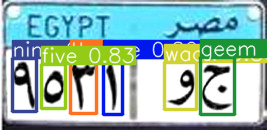

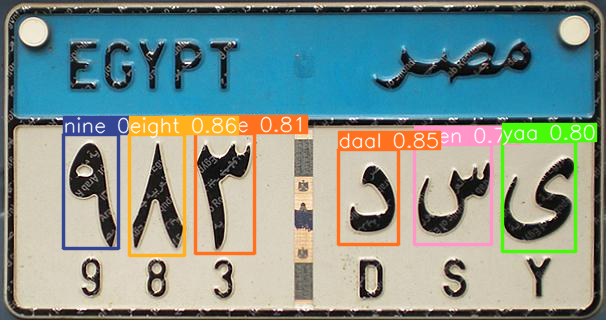

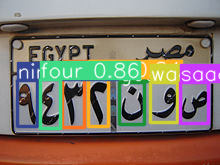

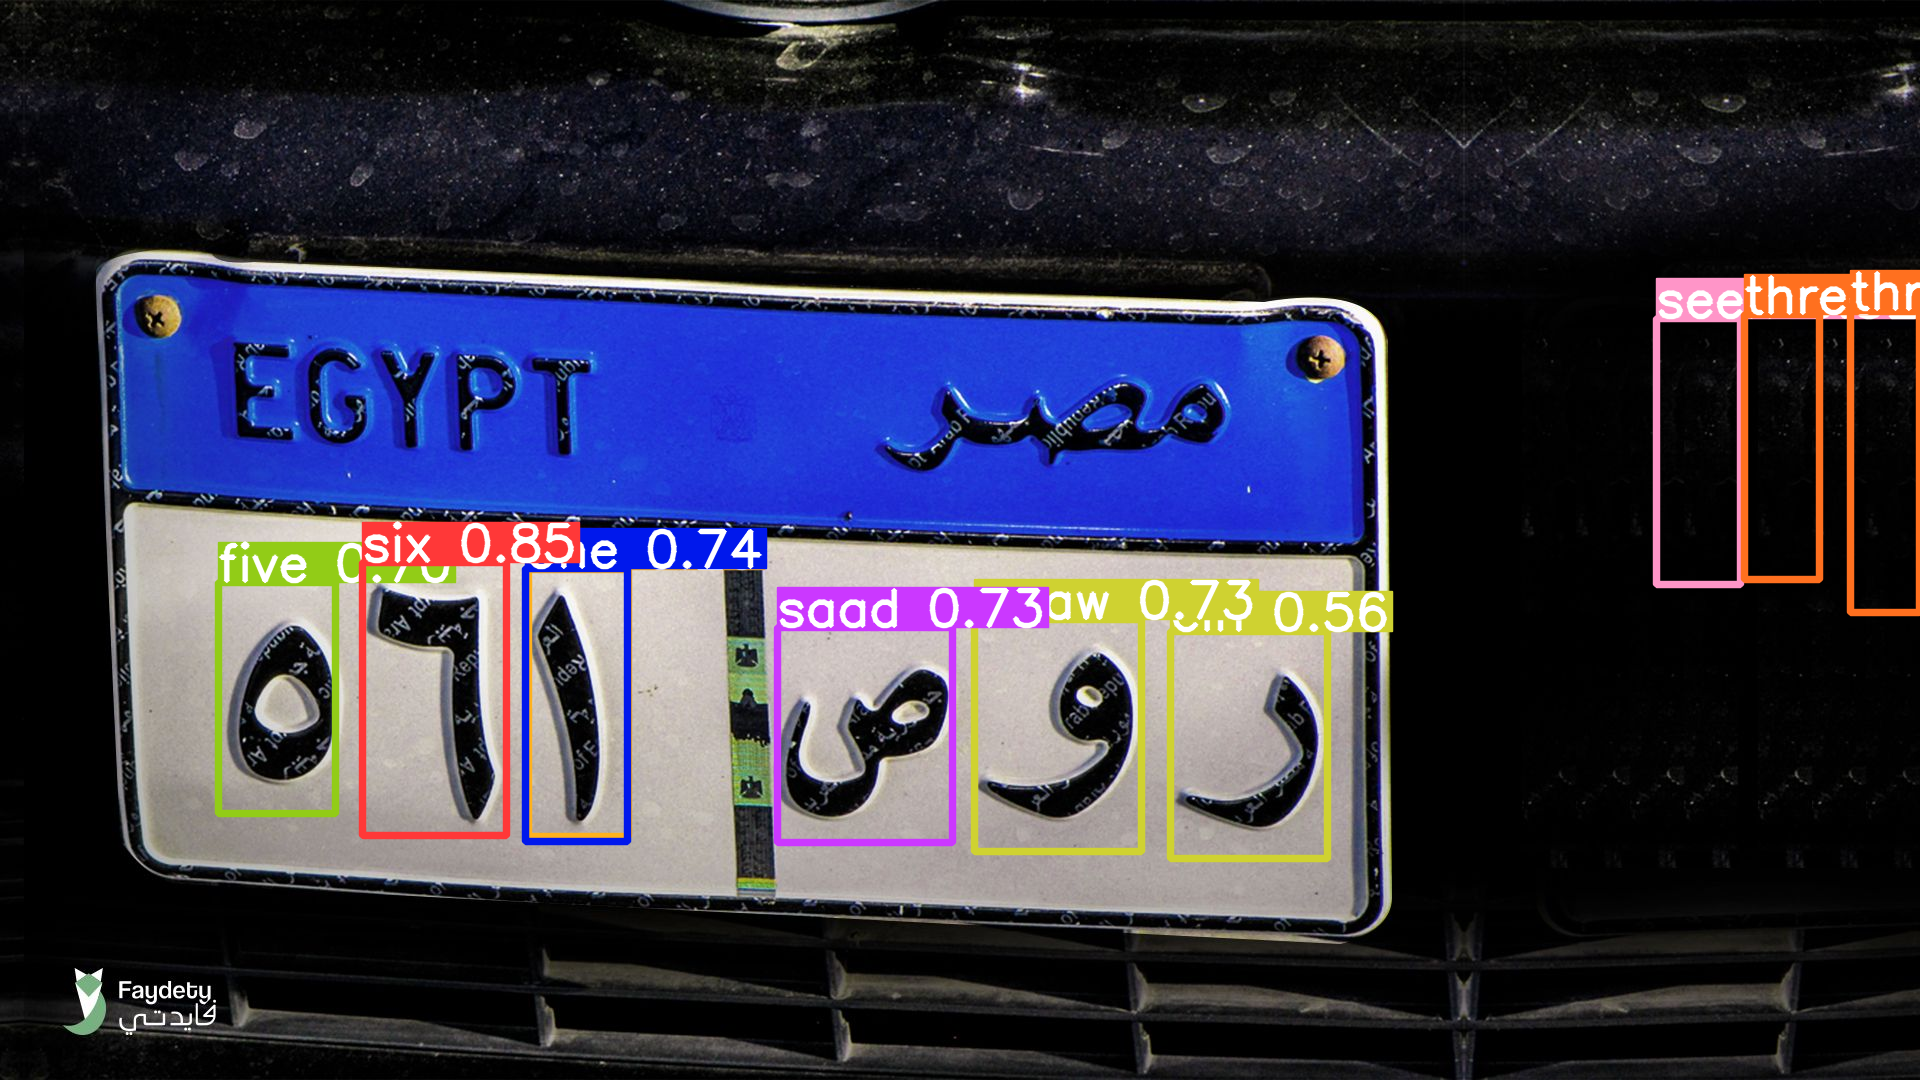

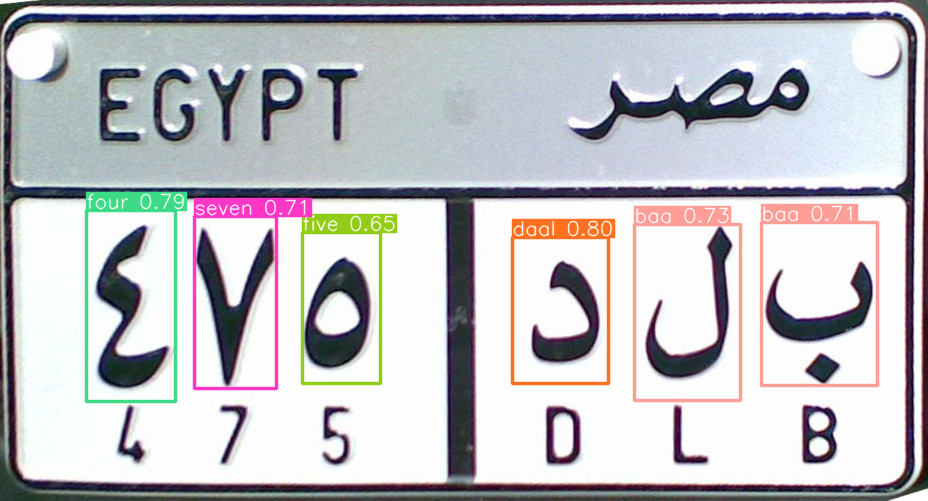

In [7]:
images = '/content/images/'
# Inference
for img in os.listdir(images):
    # check if the image ends with png
    results = model(images + img)
    results.show()

In [8]:
images = '/content/images2/'

for img in os.listdir(images):
    try:
        img_path = os.path.join(images, img)
        result = model(img_path)
        crops = result.crop(save=True)
    except (OSError, cv2.error) as e:
        print(f"Error processing image {img}: {e}")
        continue

Saved 1 image to runs/detect/exp6
Saved results to runs/detect/exp6

Saved 1 image to runs/detect/exp7
Saved results to runs/detect/exp7

Saved 1 image to runs/detect/exp8
Saved results to runs/detect/exp8

Saved 1 image to runs/detect/exp9
Saved results to runs/detect/exp9

Saved 1 image to runs/detect/exp10
Saved results to runs/detect/exp10



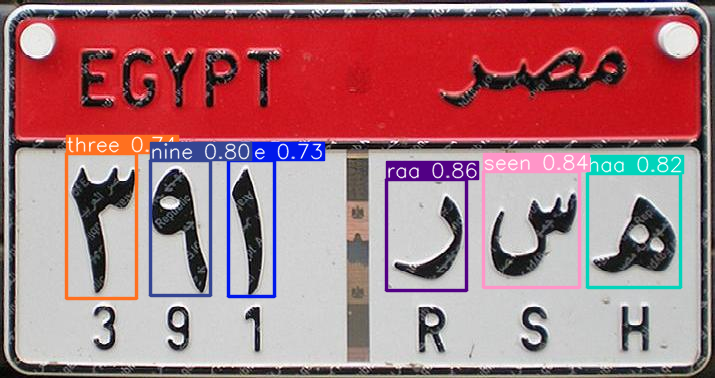

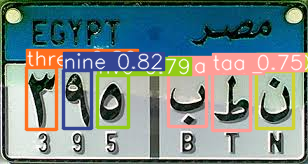

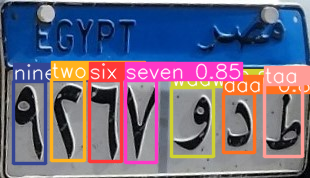

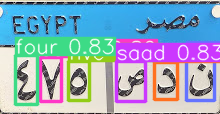

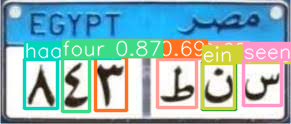

In [10]:
images = '/content/images2/'
# Inference
for img in os.listdir(images):
    # check if the image ends with png
    results = model(images + img)
    results.show()